In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [31]:
import dendrotweaks as dd
dd.__version__

'0.4.5'

In [32]:
dd.apply_dark_theme()

In [33]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [34]:
model = dd.Model(path_to_model)

In [35]:
model.list_morphologies()

['Hay_2011_modified', 'Hay_2011', 'Hay_2011_sorted']

In [36]:
model.load_morphology(file_name='Hay_2011_modified')

Sorted PointTree(root=Point(idx=0), num_nodes=4071).
Apical dendrite is already aligned.
Extended 184 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4255).


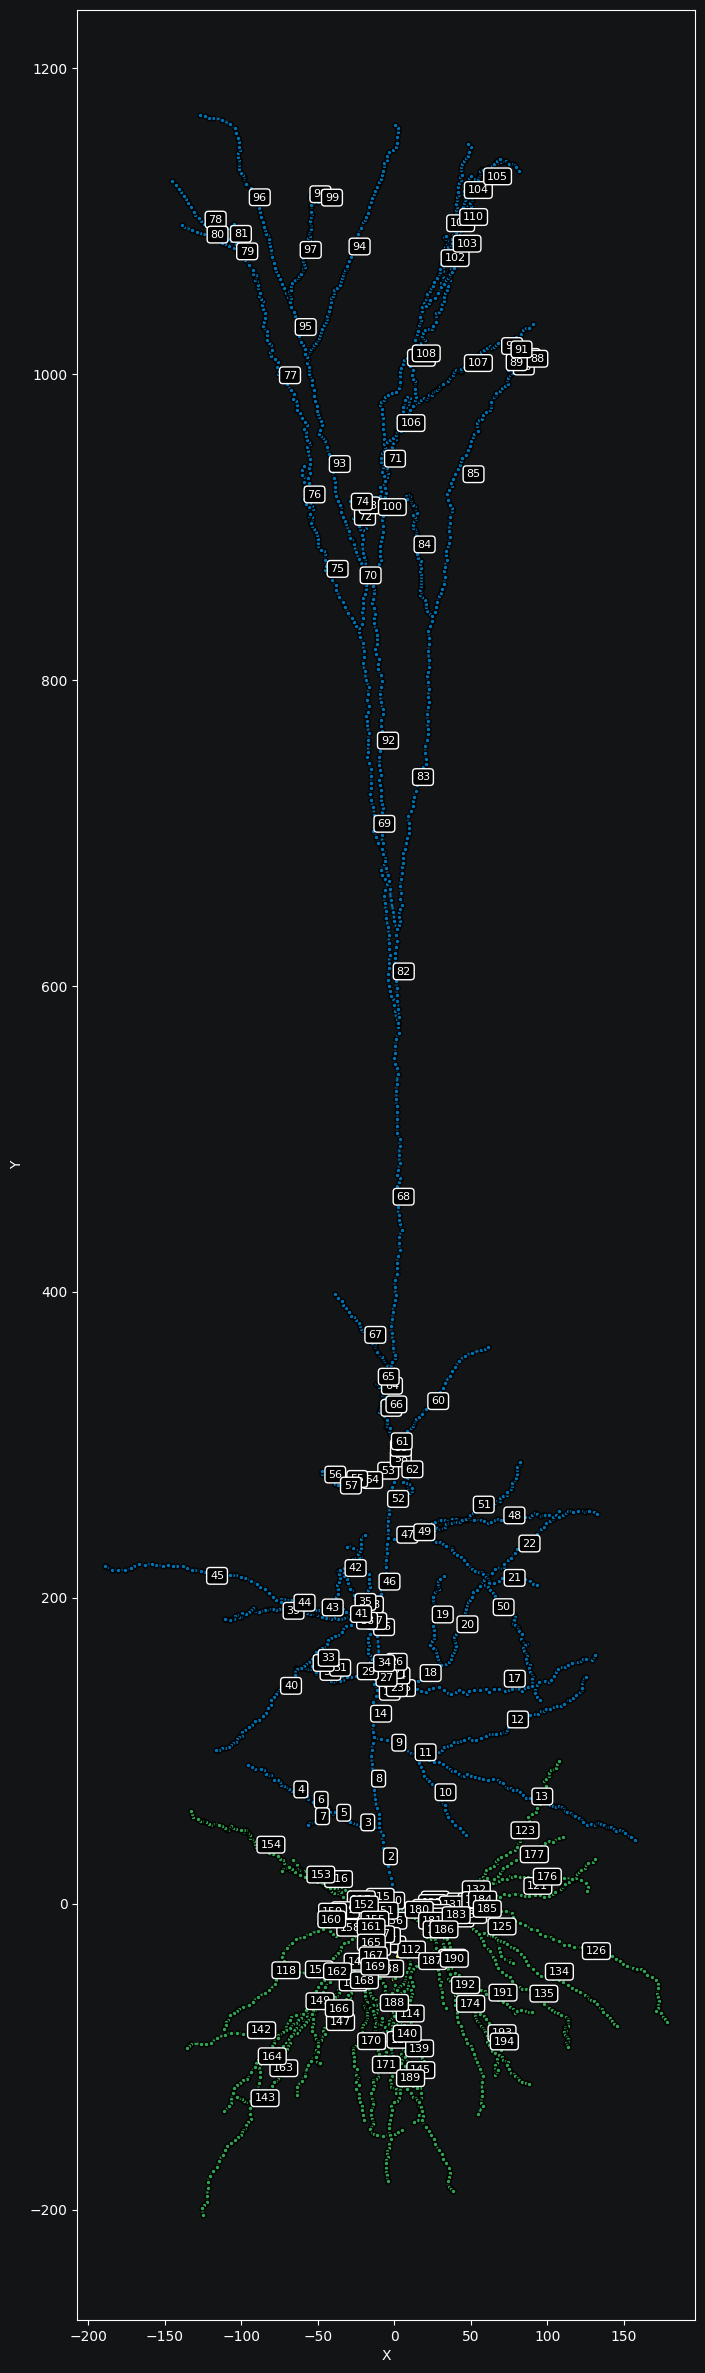

In [37]:
fig, ax = plt.subplots(figsize=(30, 30))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

# Mechanisms

In [38]:
model.list_biophys()

['Hay_2011_full', 'Hay_2011_reduced']

In [39]:
model.load_biophys('Hay_2011_full')

Mechanisms already loaded from path: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Default/vecstim.  Aborting.
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Nap_Et2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Im.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SKv3_1.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Tst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaLVAst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Pst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/Den

In [40]:
model.params

{'cm': {'all': constant({'value': 1}),
  'basal': constant({'value': 2}),
  'apical': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'axonal': constant({'value': 1})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3.38e-05}),
  'axonal': constant({'value': 3.25e-05}),
  'basal': constant({'value': 4.67e-05}),
  'apical': constant({'value': 5.89e-05})},
 'e_Leak': {'all': constant({'value': -90})},
 'depth_CaDyn': {'all': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 80}),
  'somatic': constant({'value': 460}),
  'apical': constant({'value': 122})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 0.05}),
  'somatic': constant({'value': 0.000501}),
  'apical': constant({'value': 0.000509})},
 'kt_CaDyn': {'all': constant({'value': 0})},
 'kd_CaDyn': {'all': constant({'value': 0})},
 'gbar_Im': {'all': constant({'value': 0.0}),

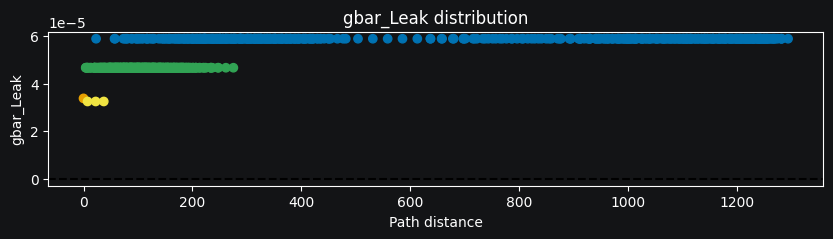

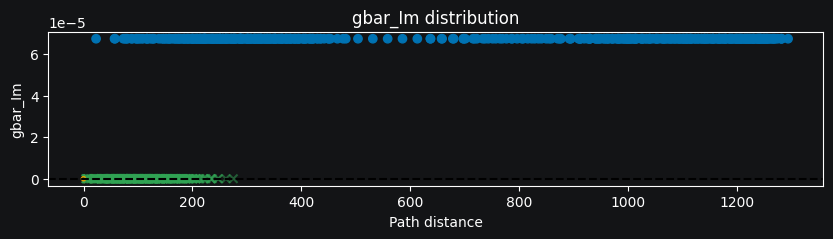

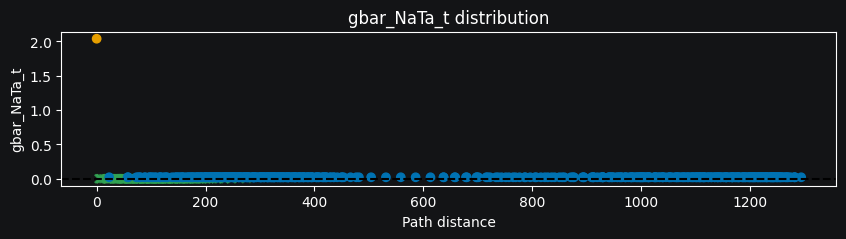

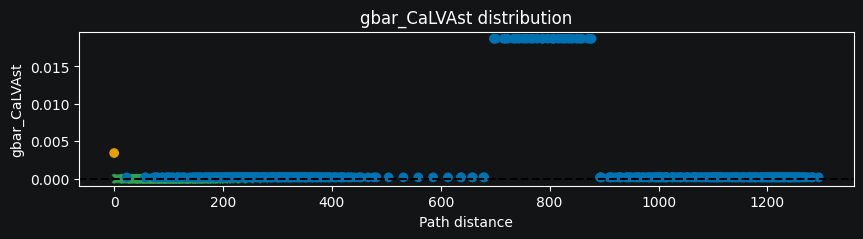

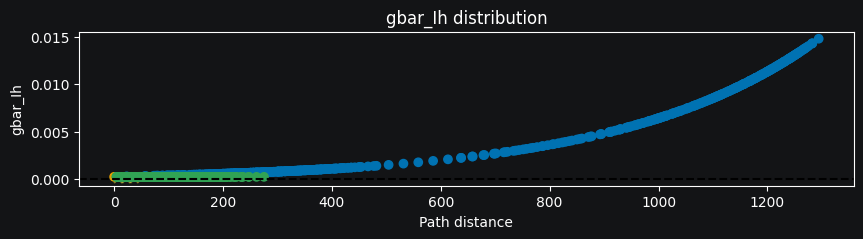

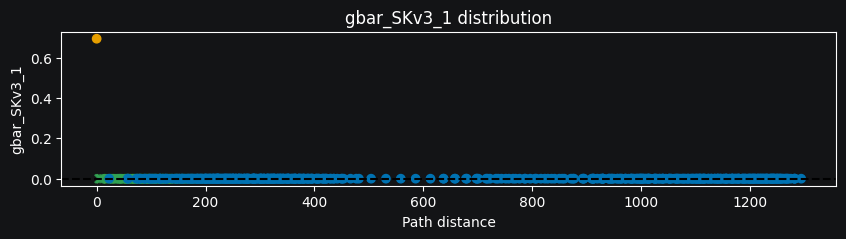

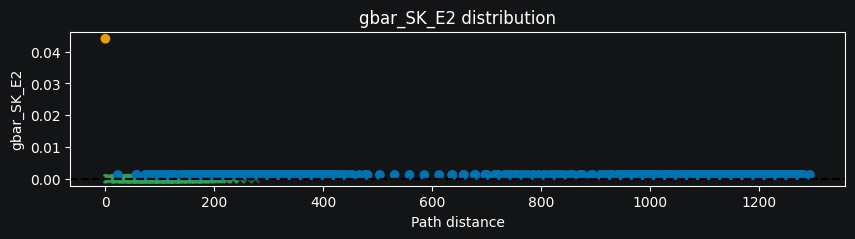

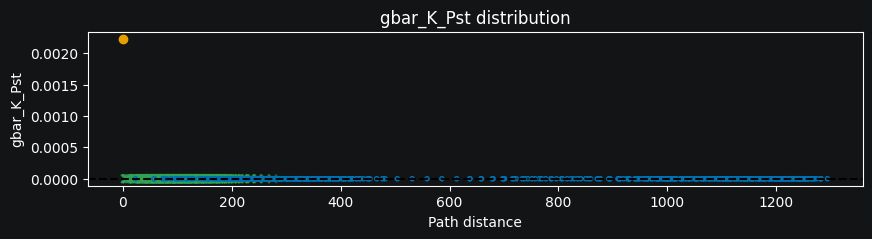

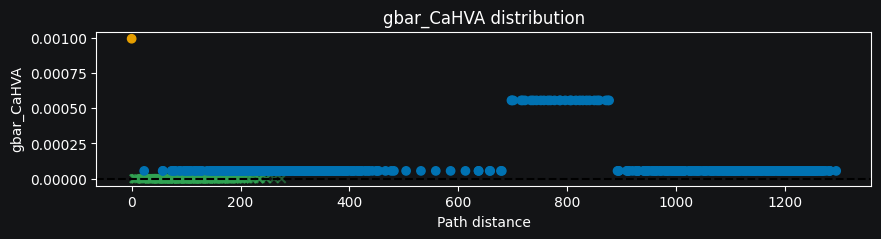

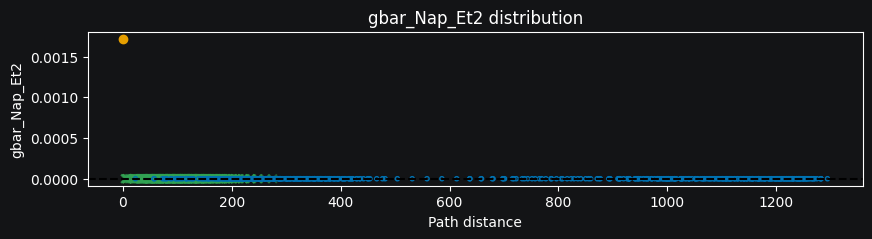

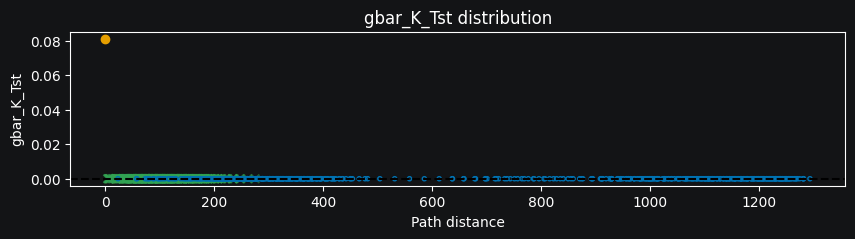

In [41]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

## Reduce

In [42]:
root = model.sec_tree[2]
print(root.domain, root.parent.domain)

apic soma


<Axes: title={'center': 'Radius Distribution - Section 2 (apic)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

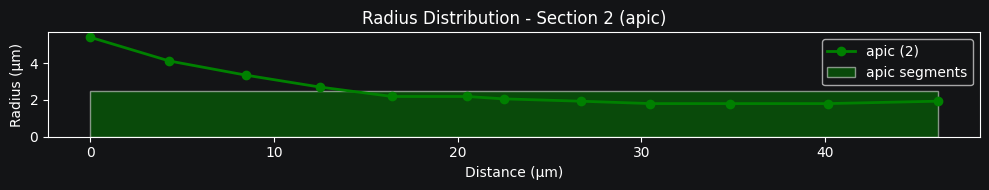

In [43]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [44]:
data = model.reduce_subtree(root, fit=True)

CableParams(length=2419.956820679183, diam=3.739652729314912, space_const=1259.8765552006237, cm=2.0, rm=16977.92869269949, ra=100.0, e_pas=-90.0, electrotonic_length=1.9207888349774294)
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=190).
Sorted PointTree(root=Point(idx=0), num_nodes=4187).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=994).
Sorted PointTree(root=Point(idx=0), num_nodes=1752).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=475).
Sorted PointTree(root=Point(idx=0), num_nodes=1742).
Interpolated for ids []


(model.py, line 385)
(model.py, line 410)


In [45]:
# # Fit distributions to data for the group
# group_name = 'apical'
# segments = model.get_segments(group_names=[group_name])
# for param_name in model.params:
#     model.fit_distribution(param_name, segments=segments, plot=True)

[]

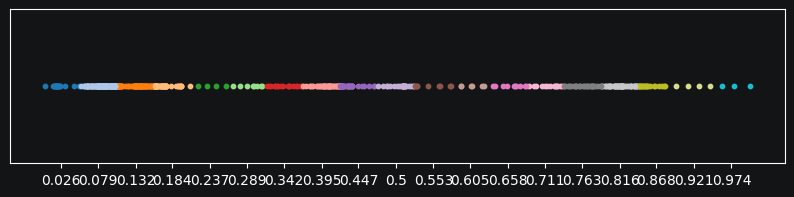

In [46]:
segs_to_reduced_segs = data['segs_to_reduced_segs']
segs_to_locs = data['segs_to_locs']
fig, ax = plt.subplots(figsize=(10, 2))

# Get the number of unique reduced segments
reduced_segs = root.segments
num_segs = len(reduced_segs)

# Create a color map with enough colors
if num_segs <= 10:
    colors = plt.cm.tab10.colors
elif num_segs <= 20:
    colors = plt.cm.tab20.colors
else:
    # For more than 20 segments, create a custom colormap with more colors
    cmap = plt.cm.viridis
    colors = [cmap(i/num_segs) for i in range(num_segs)]

# Map segments to colors
reduced_seg_to_color = {seg: colors[i % len(colors)] for i, seg in enumerate(reduced_segs)}

ax.set_ylim(-1, 1)
for seg, loc in segs_to_locs.items():
    plt.scatter(loc, [0], s=10, color=reduced_seg_to_color[segs_to_reduced_segs[seg]])

norm_centers = np.round(np.array(root.seg_centers)/root.L, 3)
ax.set_xticks(norm_centers)
ax.set_xticklabels(norm_centers)
ax.set_yticks([])

<Axes: title={'center': 'Radius Distribution - Section 86 (reduced_0)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

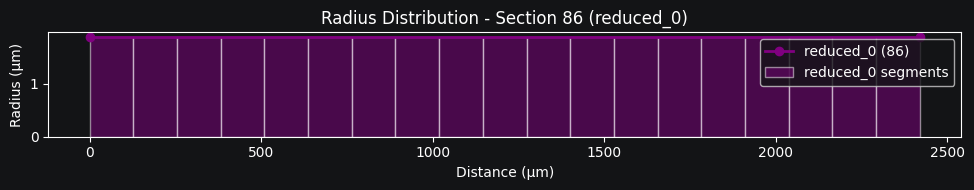

In [47]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [48]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,cm,basal,constant,{'value': 2}
2,Independent,cm,somatic,constant,{'value': 1}
3,Independent,cm,axonal,constant,{'value': 1}
4,Independent,cm,reduced_0,constant,{'value': 2.0}
...,...,...,...,...,...
59,Nap_Et2,gbar_Nap_Et2,somatic,constant,{'value': 0.00172}
60,Nap_Et2,gbar_Nap_Et2,reduced_0,constant,{'value': -0.0}
61,K_Tst,gbar_K_Tst,all,constant,{'value': 0.0}
62,K_Tst,gbar_K_Tst,somatic,constant,{'value': 0.0812}


# Groups

In [49]:
model.domains_to_mechs

{'axon': {'Leak'},
 'soma': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'},
 'basal': {'Ih', 'Leak'},
 'reduced_0': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'}}

In [50]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'soma', 'basal', 'reduced_0']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'basal': SegmentGroup("basal", domains=['basal']),
 'reduced_0': SegmentGroup("reduced_0", domains=['reduced_0'])}

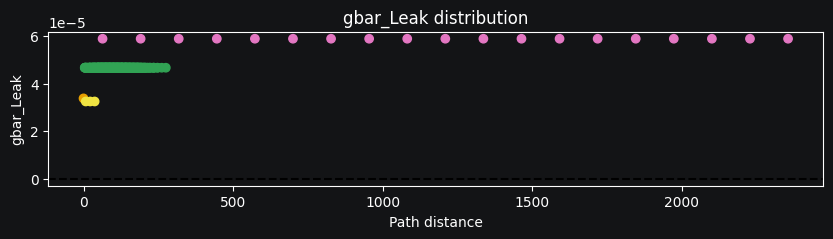

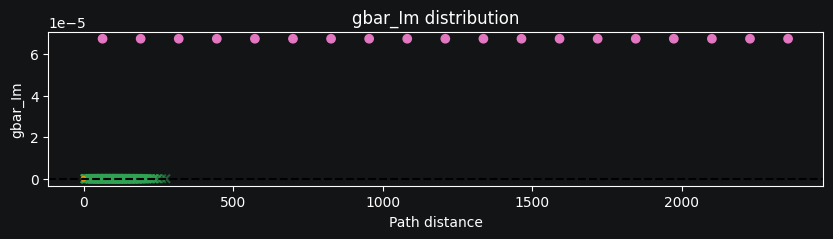

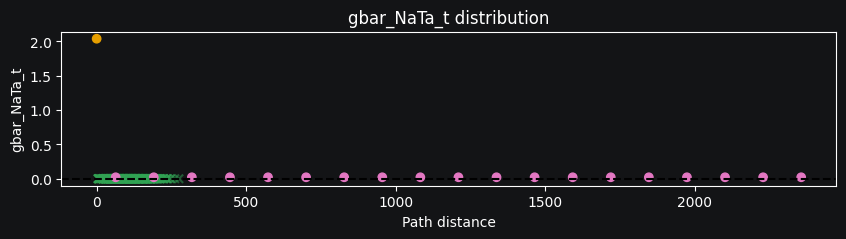

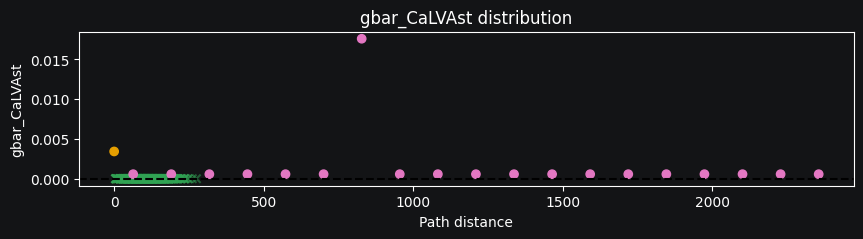

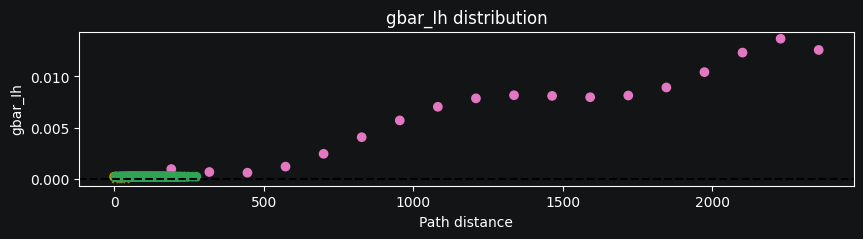

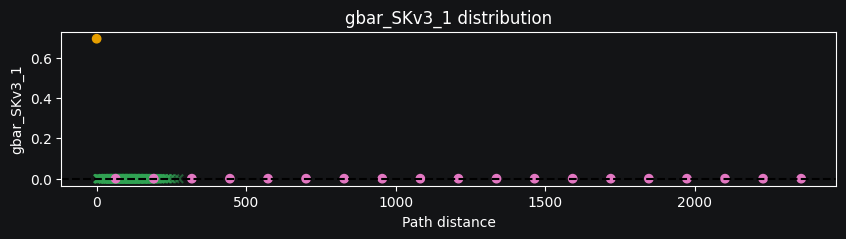

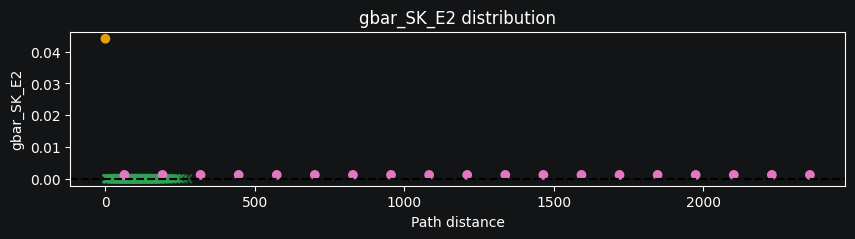

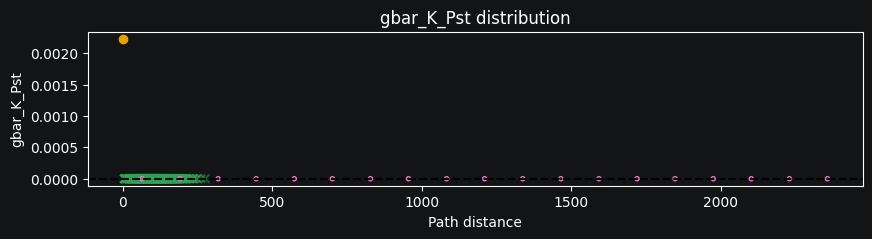

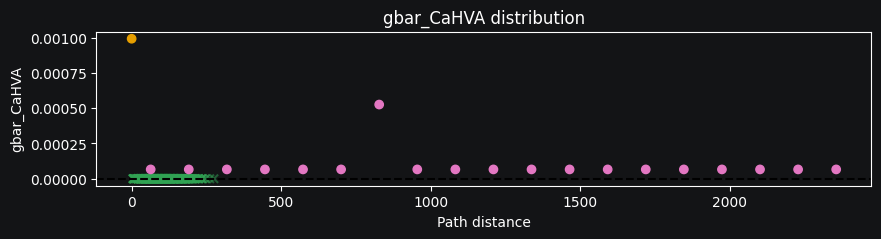

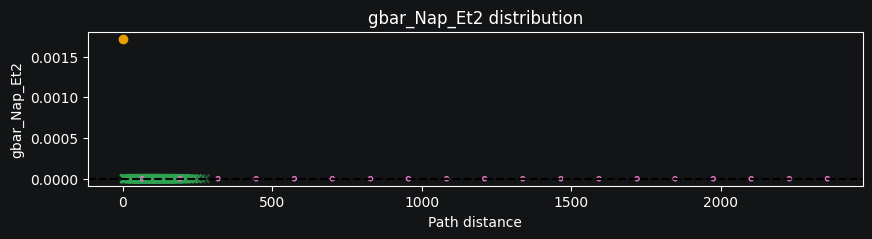

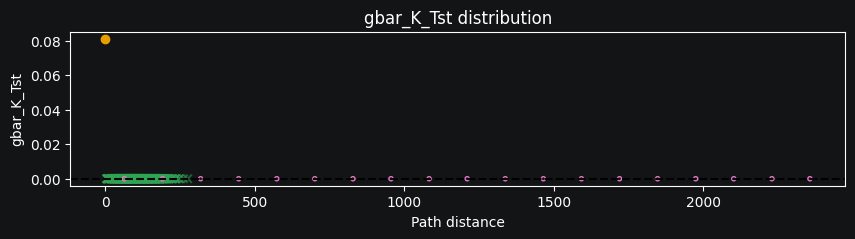

In [51]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

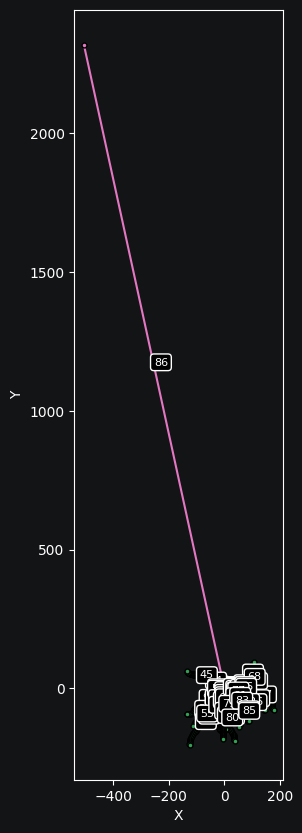

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [53]:
model.list_stimuli()

['depolarizing_current',
 'attenuation_dend',
 '20_AMPA_NMDA_1_GABAa',
 'attenuation_soma',
 'nonlinearity',
 'hyperpolarizing_current',
 'ca_spike']

In [54]:
soma = model.sec_tree.soma
model.load_stimuli('depolarizing_current')

IClamp added to sec NeuronSection(idx=0) at loc 0.5.
Recording added to sec NeuronSection(idx=0) at loc 0.5.


In [55]:
model.iclamps[soma(0.5)].amp= 0.793

In [56]:
model.run(1000)

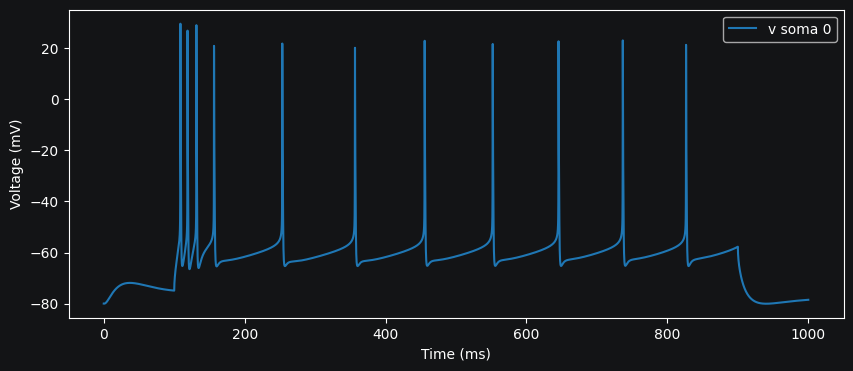

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)

In [58]:
model.export_biophys('Hay_2011_reduced')

# Example

In [59]:
from dendrotweaks.utils import poly_fit, step_fit, mse

Step Fit Parameters: (0.5555555555555556, 0.8888888888888888, 0.1, 0.9)


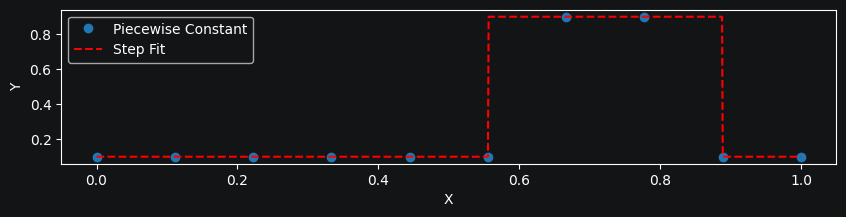

In [60]:
def step(x, start, end, min_y, max_y):
    """
    start < x < end -> max_y
    else -> min_y
    """
    y = np.where((x > start) & (x < end), max_y, min_y)
    return y

x = np.linspace(0, 1, 10)
y = step(x, 0.6, 0.8, 0.1, 0.9)

# try step_fit
params, y_pred = step_fit(x, y)
print("Step Fit Parameters:", params)

x_new = np.linspace(0, 1, 1000)
y_new = step(x_new, *params)

fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(x, y, 'o', label='Piecewise Constant')
ax.plot(x_new, y_new, label='Step Fit', color='red', linestyle='--')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()